In [1]:
!pip install deepface

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2

/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2


In [4]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
from os import listdir
from deepface import DeepFace

In [5]:
database ={}
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [6]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
i = 6

In [7]:
def mencocokan_wajah_cosine_similarity(img_path):
  index = 0
  prediksi = 0
  jarak = 0
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=models[i], 
                                     align=False,
                                     enforce_detection = True))
  for key, value in database.items() :
    pic1 = value
    distance_vector = np.square(pic1 - pic2)
    distance = cosine_similarity(pic1.reshape(1,-1),pic2.reshape(1,-1))
    hasil.append([key,distance])
    if(distance > jarak ):
        prediksi = index
        jarak = distance
  index += 1
  
  df = pd.DataFrame(hasil, columns = ['Photo', 'Similarity'])
  df.sort_values(by='Similarity', ascending=False, inplace=True)
  
  df = menampilkan_hasil(img_path, df, 'Similarity')

  return df

In [8]:
def mencocokan_wajah_euclidean_distance(img_path):
  index = 0
  prediksi = 0
  jarak = 10
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=models[i], align=False,
                                     enforce_detection = True))
  for key, value in database.items() :
    pic1 = value
    distance_vector = np.square(pic1 - pic2)
    distance = np.sqrt(distance_vector.sum())
    hasil.append([key,distance])
    if(distance < jarak ):
        prediksi = index
        jarak = distance
    index += 1
  
  df = pd.DataFrame(hasil, columns = ['Photo', 'Distance'])
  df.sort_values(by='Distance', ascending=True, inplace=True)
  
  df = menampilkan_hasil(img_path, df, 'Distance')
  return df

In [9]:
def euclidean_distance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [10]:
def menampilkan_hasil(img_path, df, field):

  fig = plt.figure(figsize=(10,20))
  fig.add_subplot(3,2,1)
  img2 = plt.imread(img_path)
  plt.title("Asli")
  plt.imshow(img2)
  plt.axis('off')
  z = 2
  for index, row in df.head().iterrows():
      fig.add_subplot(3,2,z)
      img2 = plt.imread('AnggotaKelas/'+row['Photo'])
      plt.title(f"{field}: {row[field]}")
      plt.imshow(img2)
      plt.axis('off')
      z = z + 1

  plt.show()
  return df

arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:03<00:00, 38.0MB/s]


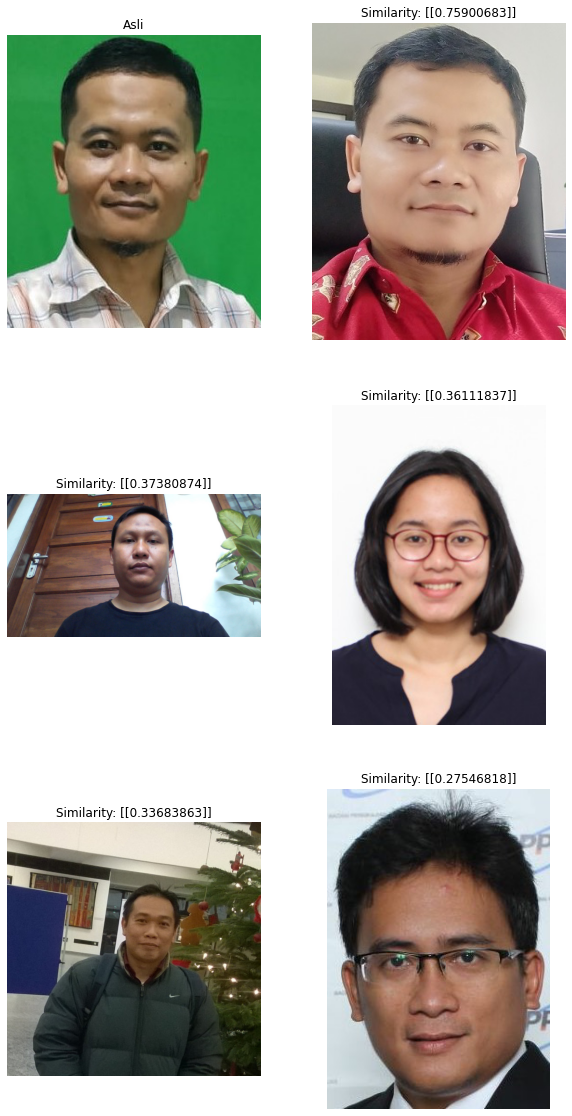

In [11]:
img_path = 'fotoTest/yaya setiyadi.jpg'
img = cv2.imread(img_path)
df = mencocokan_wajah_cosine_similarity(img_path)

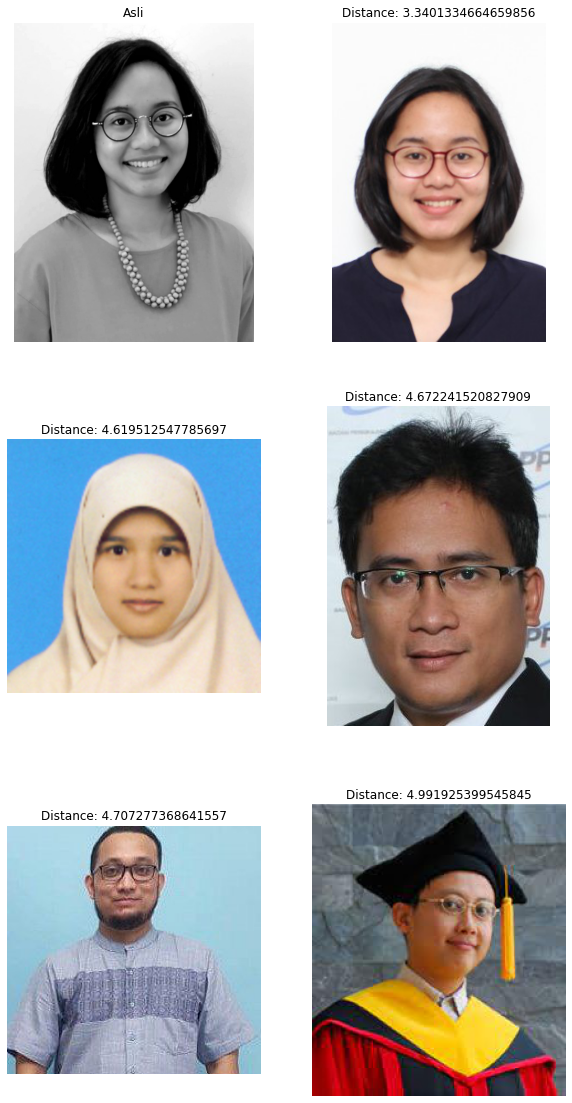

In [12]:
img_path = 'fotoTest/meredita susanty.jpg'
img = cv2.imread(img_path)
df = mencocokan_wajah_euclidean_distance(img_path)

In [23]:
def mencari_wajah_euclidean_distance(img_path):
  index = 0
  prediksi = ''
  jarak = 10
  pic2 = np.array(DeepFace.represent(img_path, model_name=models[i], align=False,
                                     enforce_detection = True))
  for key, value in database.items() :
    pic1 = value
    distance = euclidean_distance(pic1,pic2)
    # print(distance)
    if(distance < jarak):
        prediksi = key
        jarak = distance
    index += 1
  menampilkan_wajah_cocok(img_path, prediksi, jarak)

In [27]:
def menampilkan_wajah_cocok(image_path, prediksi, jarak):
  threshhold = 4.4 
  if(jarak < threshhold):
    print (f"Ini anggota kelas bernama : {prediksi.split('.')[0]}-{round(jarak,3)}" )
  else :
    print ("Ini BUKAN anggota kelas")

  img = plt.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

Ini anggota kelas bernama : Meza Silvana-3.356


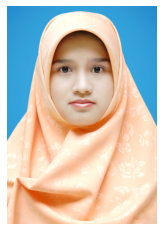

In [28]:
img_path = 'fotoTest/meza silvana.jpg'
mencari_wajah_euclidean_distance(img_path)

Ini anggota kelas bernama : Meredita Susanty-3.34


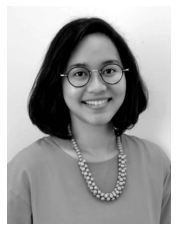

In [29]:
img_path = 'fotoTest/meredita susanty.jpg'
mencari_wajah_euclidean_distance(img_path)

Ini BUKAN anggota kelas


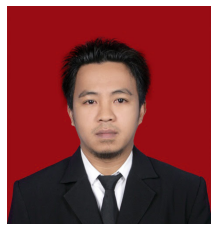

In [30]:
img_path = 'fotoTest/sucipto.jpg'
mencari_wajah_euclidean_distance(img_path)

/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2/UploadFiles


Saving 600.png to 600.png
User uploaded file "600.png" with length 296573 bytes
/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2
---------------------------------
Ini BUKAN anggota kelas


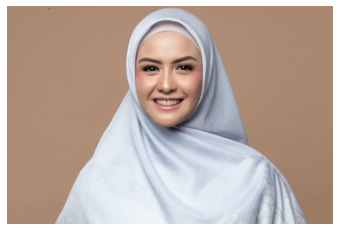

In [34]:
%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2/UploadFiles
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])));

%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2
img_path = "UploadFiles/" + fn
print("---------------------------------")
mencari_wajah_euclidean_distance(img_path)